In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDRegressor

%matplotlib inline
plt.style.use(['ggplot'])

In [44]:
# fetch data from github 
dataset = pd.read_csv('https://raw.githubusercontent.com/NorthPhoenix/ML-Gradual_Descent_Algorithm/main/dataset/Tetuan%20City%20power%20consumption.csv')

In [45]:
# get rid of unnecessary columns like index, date, and the last two columns
dataset = dataset.iloc[:, 1:-2]

In [46]:
# preporcessing
# rename columns
dataset.rename(columns={'Zone 1 Power Consumption': 'Power', 'Temperature': 'Temp', 'Wind Speed': 'Wind', 'general diffuse flows': 'Gen_Dif_Flow', 'diffuse flows': 'Dif_Flow'}, inplace=True)
dataset.drop('Wind', axis=1, inplace=True)
# separate features from label
X = dataset.drop('Power', axis=1).to_numpy()
Y = dataset['Power'].to_numpy()


In [ ]:
# print useful information about the dataset
dataset.describe()

,Temp,Humidity,Gen_Dif_Flow,Dif_Flow,Power
count,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000
mean,18.810024,68.259518,182.696614,75.028022,32344.970564
std,5.815476,15.551177,264.400960,124.210949,7130.562564
min,3.247000,11.340000,0.004000,0.011000,13895.696200
25%,14.410000,58.310000,0.062000,0.122000,26310.668692
50%,18.780000,69.860000,5.035500,4.456000,32265.920340
75%,22.890000,81.400000,319.600000,101.000000,37309.018185
max,40.010000,94.800000,1163.000000,936.000000,52204.395120


In [ ]:
# standardize the features
s = StandardScaler()
X = pd.DataFrame(s.fit(X).fit_transform(X))

# split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)

X_train = np.array(X_train)
X_test = np.array(X_test)
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)
type(X_train)

numpy.ndarray

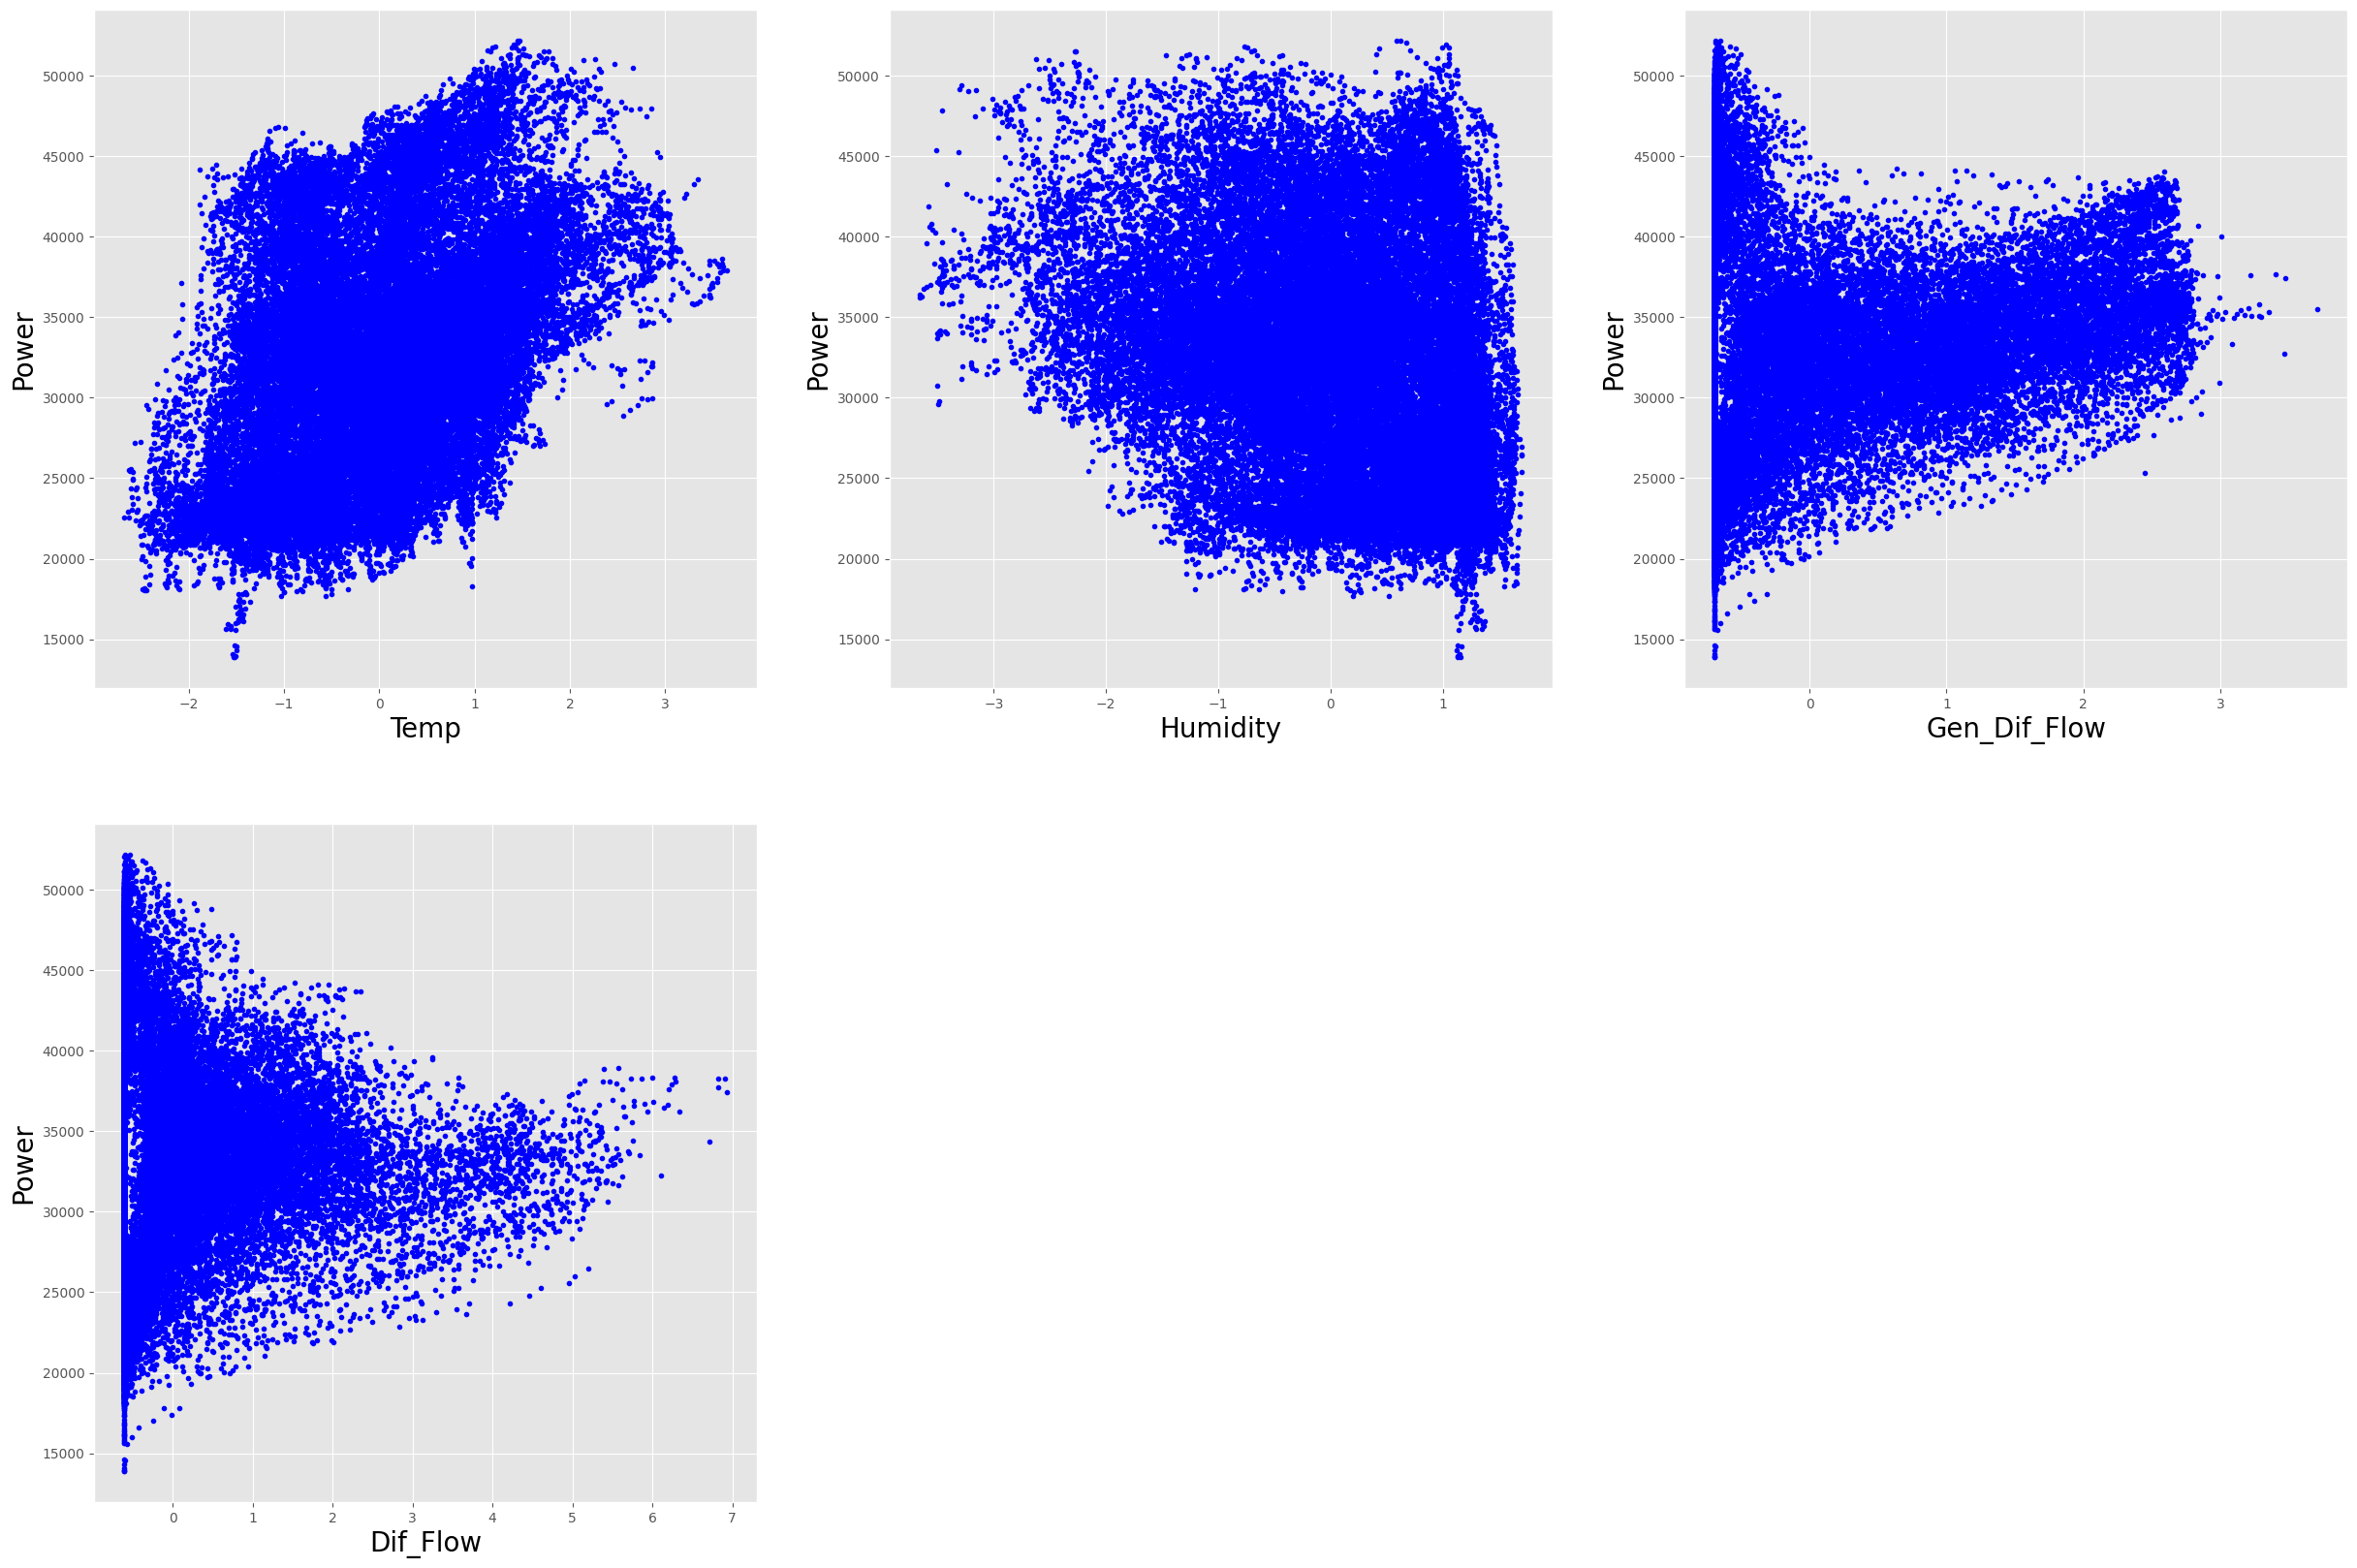

In [ ]:
# plot the training features against the label
fig = plt.figure(figsize=(30,20))

for i in range(len(X_train[0])):
    plt.subplot(2, 3, i+1)
    plt.plot(X_train[:, i], Y_train, 'b.')
    plt.ylabel('Power', fontsize=20)
    plt.xlabel(dataset.columns[i], fontsize=20)
plt.show()

In [ ]:
def gradient(X, Y, w):
    # dJ/dw0 = 1/n*sum(w0 + X*w1 + X**2*w2 + X**3*w3 - Y)
    # dJ/dw1 = 1/n*sum(w0 + X*w1 + X**2*w2 + X**3*w3 - Y)*X
    residual = w[0] + X*w[1] - Y
    dJdw0 = np.mean(residual)
    dJdw1 = np.mean(residual * X)
    return dJdw0, dJdw1


In [ ]:
def gradient_discent_2D(X, Y, w, learning_rate=0.01, iterations=1000, tolerance=1e-06):
    # using only one feature for now (2D)
    # using linear function: Y = w0 + X*w1
    # therefore the MSE function is J = 1/2n*sum(w0 + X*w1 - Y)**2
    # dJ/dw0 = 1/n*sum(w0 + X*w1 - Y)
    # dJ/dw1 = 1/n*sum(w0 + X*w1 - Y)*X
    for _ in range(iterations):
        diff = -learning_rate * np.array(gradient(X, Y, w))
        if np.all(np.abs(diff) <= tolerance):
            break
        w += diff
    return w

In [ ]:
# gradient descent vector helper functions
def generateXVector(X: np.ndarray) -> np.ndarray:
    newX = np.concatenate((np.ones((len(X), 1)), X), axis=1)
    return newX

def generateYVector(Y: np.ndarray) -> np.ndarray:
    newY = np.reshape(Y, (len(Y), 1))
    return newY

def generateWVector(X: np.ndarray) -> np.ndarray:
    w = np.zeros((len(X[0]), 1))
    return w

In [ ]:
def gradient_discent_vector(X, Y, learning_rate=0.01, iterations=1000, tolerance=1e-06):

    Y = generateYVector(Y)
    X = generateXVector(X)
    W = generateWVector(X)
    costs = []
    n = len(X)
    # print(f'X Shape: {X.shape}')
    # print(f'W Shape: {W.shape}')
    # print(f'Y Shape: {Y.shape}')

    for i in range(iterations):
        gradients = 2/n * X.T.dot(X.dot(W) - Y)
        W = W - learning_rate * gradients
        predictedY = X.dot(W)
        # calculate the cost
        # J = 1/2n * sum( (h(x) - y)^2 )
        cost = 1/(2*len(Y))*((predictedY - Y)**2) 
        costs.append(cost.sum())
    return W, costs

In [ ]:
# test gradient_discent_2D
W_2D = np.zeros(2,)
X_i = 1
W_2D = gradient_discent_2D(X_train[:,X_i], Y_train, W_2D, iterations=1200)
print(W_2D)

[32364.11235334 -2053.68530563]


In [ ]:
def predict(X: np.ndarray, W: np.ndarray) -> np.ndarray:
    newX = np.concatenate((np.ones((len(X), 1)), X), axis=1)
    return newX.dot(W).flatten()

In [ ]:
# test gradient_discent_vector
W_vector, costs = gradient_discent_vector(X_train, Y_train)

Y_train_predict = predict(X_train, W_vector)
mse = mean_squared_error(Y_train, Y_train_predict)
r2 = r2_score(Y_train, Y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print("\n")

The model performance for training set
--------------------------------------
MSE is 40527647.45134288
R2 score is 0.20548173707059725




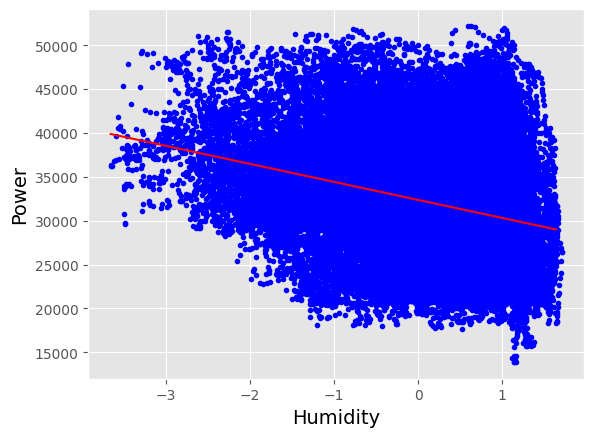

In [ ]:
plt.plot(X_train[:,X_i], Y_train, 'b.')

X_plot = np.arange(X_train[:,X_i].min(), X_train[:,X_i].max(), 0.1)
plt.plot(X_plot, W_2D[0] + X_plot*W_2D[1], 'r-')

plt.ylabel('Power', fontsize=14)
plt.xlabel(dataset.columns[X_i], fontsize=14)
plt.show()

In [ ]:
# testing with the built-in model
model = SGDRegressor(alpha=0.0000001, eta0=0.001, max_iter = 10000000, tol = 0.000001)

model.fit(X_train, Y_train)

# model evaluation for training set
y_train_predict = model.predict(X_train)
mse = mean_squared_error(Y_train, y_train_predict)
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print("\n")

The model performance for training set
--------------------------------------
MSE is 40528336.044138275
R2 score is 0.20546823765511013


